# Python for data analysis and visualisation

## Online short course at the University of St Andrews

## Final assignment

### Tillman Froehlich

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Dataset Refinement

Run the executable python script `refine.py` on the original dataset.

In [2]:
#%run ../code/refine.py ../data/Scotland_teaching_file_1PCT.csv

Now read the data off the refined dataset created by `refine.py`.

In [3]:
df = pd.read_csv("../data/Refined_dataset.csv")
df

,Record_Number,Region,RESIDENCE_TYPE,Family_Composition,sex,age,Marital_Status,student,Country_Of_Birth,health,Ethnic_Group,religion,Economic_Activity,Occupation,industry,Hours_Worked_Per_Week,Approximate_Social_Grade
0,1,S92000003,P,1,1,4,2,2,2,2,1,5,1,5,5,4,3
1,2,S92000003,P,0,1,3,1,2,1,2,1,1,1,1,8,3,2
2,3,S92000003,P,1,2,4,2,2,1,3,1,1,1,4,8,2,4
3,4,S92000003,P,1,2,6,2,2,1,1,1,1,1,2,8,4,2
4,5,S92000003,P,4,2,4,4,2,1,2,1,1,1,3,11,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63383,63384,S92000003,P,1,1,2,1,1,1,1,1,2,6,X,X,X,3
63384,63385,S92000003,P,1,1,4,2,2,1,1,1,1,1,3,9,3,2
63385,63386,S92000003,P,1,1,5,2,2,1,1,1,9,1,8,3,4,4
63386,63387,S92000003,P,4,2,1,1,1,1,1,1,9,X,X,X,X,X


This dataset can now be used for further data analysis.

#### Descriptive Analysis

* perform the descriptive analysis of the dataset:

  *    determine the total number of records in the dataset;

  *    determine the type of each variable in the dataset;

  *    for each variable except “Record_Number” and “Region”, find all different values that it takes, and the number of occurrences for each value,



In [4]:
df.shape[0]

63388

In [5]:
df.dtypes

Record_Number                int64
Region                      object
RESIDENCE_TYPE              object
Family_Composition          object
sex                          int64
age                          int64
Marital_Status               int64
student                      int64
Country_Of_Birth             int64
health                       int64
Ethnic_Group                 int64
religion                     int64
Economic_Activity           object
Occupation                  object
industry                    object
Hours_Worked_Per_Week       object
Approximate_Social_Grade    object
dtype: object

In [6]:
# Ignore "Record_Number" and "Region" columns
df_data = df.drop(["Record_Number", "Region"], axis = 1)

for col_name in df_data.columns:
    # Find all values taken in each column
    count = df_data[col_name].value_counts()
    col_index = count.index
    print(col_name)

    for value in col_index:
        # Print number of occurences of each value
        print(value, count.loc[value])

RESIDENCE_TYPE
P 62239
C 1149
Family_Composition
1 33337
0 11716
4 7757
2 7660
X 1149
3 1019
5 750
sex
2 32696
1 30692
age
1 10980
5 9336
4 8963
3 8056
6 7854
2 7541
7 5731
8 4927
Marital_Status
1 29611
2 23918
4 4159
5 4032
3 1668
student
2 51397
1 11991
Country_Of_Birth
1 59045
2 4343
health
1 33436
2 18825
3 7544
4 2759
5 824
Ethnic_Group
1 60901
3 1667
4 376
2 199
6 165
5 80
religion
2 34199
1 23309
9 4335
6 906
4 187
8 162
7 116
3 113
5 61
Economic_Activity
1 25350
5 11527
X 10980
2 3623
6 2691
8 2543
3 2183
4 1743
7 1741
9 1007
Occupation
X 14435
9 7256
2 7237
5 6140
4 6010
3 5015
7 4934
6 4484
8 4327
1 3550
industry
X 14435
4 7557
11 6817
2 6318
8 4818
10 4123
3 3876
6 3754
5 3309
9 3225
7 1979
13 1172
12 1107
1 898
Hours_Worked_Per_Week
X 32851
3 18333
2 6518
4 3543
1 2143
Approximate_Social_Grade
2 15607
4 14709
X 12090
3 11602
1 9380


#### Plotting Graphs

* build the following plots:

    * bar chart for the number of records for each age group;

    * bar chart for the number of records for each occupation,

In [7]:
def get_cats_counts(dataframe, variable):
    """Gets the distribution of 'variable' in 'dataframe'.

    Returns 2 lists:
    categories  A list of all the values taken in the
                'variable' column of 'dataframe'.
    counts      A list of how many times each category
                occurs in the column.
    """
    # Get a pandas series containing the required data
    counts_series = dataframe[variable].value_counts()

    # Extract categories and counts from this series
    categories = counts_series.index.to_list()
    counts = counts_series.to_list()

    return categories, counts

In [8]:
def bar_chart(data, variable):
    """Plots a bar chart of specified variable.
    
    Uses information provided in 'chart_data'.
    """
    fig, ax = plt.subplots()

    ax.bar(*data.loc[variable].to_list())

    plt.show()

In [9]:
# Make a dataframe which stores a title and dictionary for each column
# explaining what each category in it means
meanings = pd.DataFrame(columns = ["Title", "Dictionary"])

meanings.loc["RESIDENCE_TYPE"] = ["Residence Type", {
    "C": "Resident in a Communal Establishment",
    "P": "Not resident in a Communal Establishment"
}]
meanings.loc["Family_Composition"] = ["Family Composition", {
    "0": "Not in a family",
    "1": "Married/same-sex civil partnership couple family",
    "2": "Cohabiting couple family",
    "3": "Lone parent family (male head)",
    "4": "Lone parent family (female lead)",
    "5": "Other related family",
    "X": "No code required (residents of a communal establishment)"
}]
meanings.loc["sex"] = ["Sex", {
    "1": "Male",
    "2": "Female"
}]
meanings.loc["age"] = ["Age", {
    "1": "0 to 15",
    "2": "16 to 24",
    "3": "25 to 34",
    "4": "35 to 44",
    "5": "45 to 54",
    "6": "55 to 64",
    "7": "65 to 74",
    "8": "75 and over"
}]
meanings.loc["Marital_Status"] = ["Marital Status", {
    "1": "Single (Never married or never registered a same-sex civil partnership",
    "2": "Married or in a same sex-civil partnership",
    "3": "Separated, but still legally married or still legally in a same-sex civil partnership",
    "4": "Divorced or formerly in a same-sex civil partnership which is now legally dissolved",
    "5": "Widowed or surviving partner from a same-sex civil partnership"
}]
meanings.loc["student"] = ["Student", {
    "1": "Yes",
    "2": "No"
}]
meanings.loc["Country_Of_Birth"] = ["Country Of Birth", {
    "1": "UK",
    "2": "Non UK"
}]
meanings.loc["health"] = ["Health", {
    "1": "Very good health",
    "2": "Good health",
    "3": "Fair health",
    "4": "Bad health",
    "5": "Very bad health"
}]
meanings.loc["Ethnic_Group"] = ["Ethnic Group", {
    "1": "White",
    "2": "Mixed or multiple ethnic group",
    "3": "Asian",
    "4": "African",
    "5": "Caribbean or black",
    "6": "Other ethnic group"
}]
meanings.loc["religion"] = ["Religion", {
    "1": "No religion",
    "2": "Christian",
    "3": "Buddhist",
    "4": "Hindu",
    "5": "Jewish",
    "6": "Muslim",
    "7": "Sikh",
    "8": "Other religion",
    "9": "Not stated"
}]
meanings.loc["Economic_Activity"] = ["Economic Activity", {
    "1": "Economically active: Employed",
    "2": "Economically active: Self-Employed",
    "3": "Economically active: Unemployed",
    "4": "Economically active: Full-time student",
    "5": "Economically inactive: Retired",
    "6": "Economically inactive: Student",
    "7": "Economically inactive: Looking after home or family",
    "8": "Economically inactive: Long-term sick or disabled",
    "9": "Economically inactive: Other",
    "X": "No code required (Aged under 16)"
}]
#TODO check that "Age = 1" iff "Economic Activity = X"
meanings.loc["Occupation"] = ["Occupation", {
    "1": "Managers, Directors and Senior Officials",
    "2": "Professional Occupations",
    "3": "Associate Professional and Technical Occupations",
    "4": "Administrative and Secretarial Occupations",
    "5": "Skilled Trades Occupations",
    "6": "Caring, Leisure and Other Service Occupations",
    "7": "Sales and Customer Service Occupations",
    "8": "Process, Plant and Machine Operatives",
    "9": "Elementary Occupations",
    "X": "No code required (People aged under 16 and people who have never worked)"
}]
meanings.loc["industry"] = ["Industry", {
    "1": "Agriculture, forestry and fishing",
    "2": "Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply",
    "3": "Construction",
    "4": "Wholesale and retail trade; Repair of motor vehicles and motorcycles",
    "5": "Accommodation and food service activities",
    "6": "Transport and storage; Information and communication",
    "7": "Financial and insurance activities",
    "8": "Real estate activities; Professional scientific and technical activities; Administrative and support service activities",
    "9": "Public administration and defence",
    "10": "Education",
    "11": "Human health and social work activities",
    "12": "Arts; entertainment and recreation",
    "13": "Other",
    "X": "No code required (People aged under 16 and people who have never worked)"
}]
meanings.loc["Hours_Worked_Per_Week"] = ["Hours Worked Per Week", {
    "1": "Part-time: 15 or less hours worked",
    "2": "Part-time: 16 to 30 hours worked",
    "3": "Full-time: 31 to 48 hours worked",
    "4": "Full-time 49 or more hours worked",
    "X": "No code required (People aged under 16 and people not working)"
}]
meanings.loc["Approximate_Social_Grade"] = ["Approximate Social Grade", {
    "1": "AB",
    "2": "C1",
    "3": "C2",
    "4": "DE",
    "X": "No code required ( People aged under 16 and people resident in communal establishments)"
}]

meanings

,Title,Dictionary
RESIDENCE_TYPE,Residence Type,"{'C': 'Resident in a Communal Establishment', ..."
Family_Composition,Family Composition,"{'0': 'Not in a family', '1': 'Married/same-se..."
sex,Sex,"{'1': 'Male', '2': 'Female'}"
age,Age,"{'1': '0 to 15', '2': '16 to 24', '3': '25 to ..."
Marital_Status,Marital Status,{'1': 'Single (Never married or never register...
student,Student,"{'1': 'Yes', '2': 'No'}"
Country_Of_Birth,Country Of Birth,"{'1': 'UK', '2': 'Non UK'}"
health,Health,"{'1': 'Very good health', '2': 'Good health', ..."
Ethnic_Group,Ethnic Group,"{'1': 'White', '2': 'Mixed or multiple ethnic ..."
religion,Religion,"{'1': 'No religion', '2': 'Christian', '3': 'B..."


In [10]:
# Make a dataframe which stores bar chart information
chart_data = pd.DataFrame(columns = ["Categories", "Counts"])

for i in range(len(df_data.columns)):
    variable = df_data.columns[i]
    categories, counts = get_cats_counts(df_data, variable)
    chart_data.loc[variable] = [categories, counts]

chart_data

,Categories,Counts
RESIDENCE_TYPE,"[P, C]","[62239, 1149]"
Family_Composition,"[1, 0, 4, 2, X, 3, 5]","[33337, 11716, 7757, 7660, 1149, 1019, 750]"
sex,"[2, 1]","[32696, 30692]"
age,"[1, 5, 4, 3, 6, 2, 7, 8]","[10980, 9336, 8963, 8056, 7854, 7541, 5731, 4927]"
Marital_Status,"[1, 2, 4, 5, 3]","[29611, 23918, 4159, 4032, 1668]"
student,"[2, 1]","[51397, 11991]"
Country_Of_Birth,"[1, 2]","[59045, 4343]"
health,"[1, 2, 3, 4, 5]","[33436, 18825, 7544, 2759, 824]"
Ethnic_Group,"[1, 3, 4, 2, 6, 5]","[60901, 1667, 376, 199, 165, 80]"
religion,"[2, 1, 9, 6, 4, 8, 7, 3, 5]","[34199, 23309, 4335, 906, 187, 162, 116, 113, 61]"


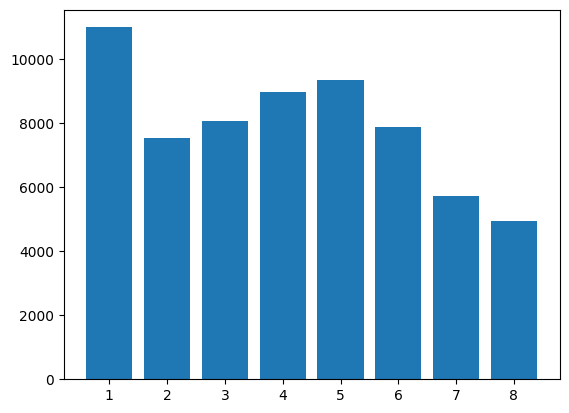

In [11]:
# Plot distribution of age using my function
bar_chart(chart_data, "age")

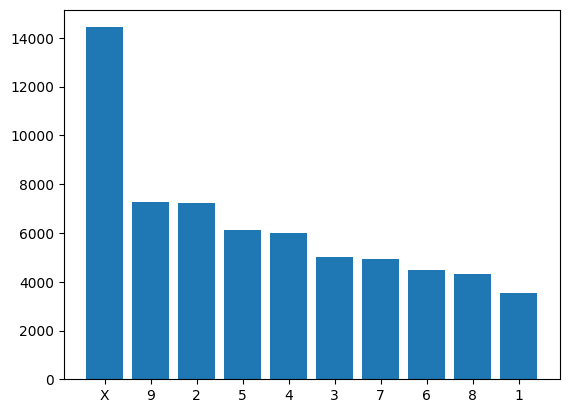

In [12]:
# Plot distribution of occupation using my function
bar_chart(chart_data, "Occupation")